#Introduction

**Problem Statement:**

Many of you may remember watching Pokémon during your childhood, so we've created an exciting challenge for you! You'll analyze data and build a machine learning model to predict the rarity of a given Pokémon. The target rarity includes four unique classes: Standard, Legendary, Mythic, and Ultra Beast.

- **Standard Pokémon:** These are the most common Pokémon found in the game. They can be caught in various environments and are typically easier to obtain. Standard Pokémon are often the backbone of trainers' teams and can evolve into more powerful forms.

- **Legendary Pokémon:** These are rare and powerful Pokémon that are often tied to special in-game events or raids. They usually have higher base stats and unique abilities compared to Standard Pokémon. Legendary Pokémon are not typically available in the wild and often require specific conditions or events to be caught.

- **Mythic Pokémon:** Mythic Pokémon are even rarer than Legendary Pokémon and are often tied to specific storylines or special quests. They are usually available for a limited time and often have unique traits or abilities. Mythic Pokémon typically cannot be caught in standard gameplay and are obtained through special research tasks.

- **Ultra Beasts:** These are a special category of Pokémon introduced in later generations. Ultra Beasts have unique designs and lore, often originating from other dimensions. They tend to have high stats and unique abilities, making them formidable in battles. Ultra Beasts can be encountered in specific events or challenges and usually have special requirements for capture.






<center><img src="https://storage.googleapis.com/kaggle-datasets-images/5494631/9104107/014a281ff7b3277881bfdbb70238860b/dataset-cover.jpg?t=2024-08-04-16-12-14" width = 410 height = 300 /></center>

........................................................................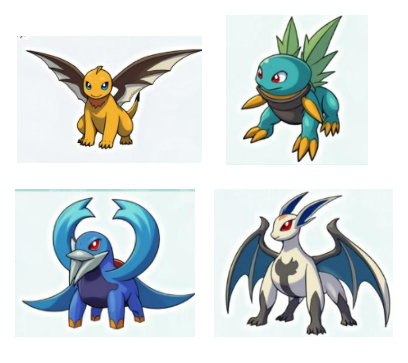......................................................................

Our goal is to determine the rarity of a Pokémon based on its features. Each of these categories adds depth to the game, offering players different challenges and opportunities for team-building and strategy


The dataset contains detailed information on 1007 Pokémon from the popular mobile game Pokémon GO. It includes a wide range of attributes such as base stats, move sets, rarity, and acquisition methods.

The data is downloded from kaggle please refer to this <a href='https://www.kaggle.com/datasets/shreyasur965/pokemon-go'>link</a> for more details about the data.



# STEP 1: Import the necessary Libraries

In [18]:
# Core libraries
  # For numerical operations
  # For data manipulation and analysis

# Data visualization libraries
  # For creating attractive visualizations
  # For plotting graphs and charts

# Machine learning libraries
  # For splitting data into training and testing sets
  # For evaluation metrics
  # For additional classification metrics
  # For feature scaling (standardization)
  # For ensemble classification algorithms

# Imbalanced data handling
  # For handling class imbalance using Synthetic Minority Over-sampling Technique

# Warning management

# To ignore warning messages during execution

# STEP 2: Loading the Data

**Dataset Information:**

The data was collected using the RapidAPI Pokémon GO API, offering researchers and data enthusiasts a rich resource for analysis, machine learning projects, and game strategy development.

Key features of this dataset include:

- Comprehensive coverage of 1007 Pokémon
- 24 attributes for each Pokémon, including battle stats, type, and rarity
- Information on acquisition methods (wild, egg, raid, etc.)
- Move set details for both fast and charged moves
- Game mechanics data such as capture and flee rates

### 2.1 Load the dataset, set columns to display 30, and view it
* Identify the type of values (numerical, categorical, or any format) present in the columns.

In [19]:
# Load the dataset
import pandas as pd
# Reading the 'pokemon.csv' file into a DataFrame
df = pd.read_csv('./resources/pokemon.csv')
# Set pandas display option to show 30 columns
pd.set_option('display.max_columns', 30)


# Display the first 5 rows of the dataset
df.head()
# Show the first few entries to get an overview of the data

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,3,1275,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,3,1943,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,3,3112,0.2,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,3,1121,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,3,1891,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [20]:
                  # Grass Fire Water Electric Ice Fighting Poison Ground Flying Psychic Bug Rock Ghost Dragon Dark Steel Fairy
# [Grass, Fire]       1    1    0      0  ..........................
# MultiLabelBinarization

### 2.2 Check the unique values in the `rarity` column

In [21]:
# Find unique values in the 'rarity' column
df['rarity'].unique() # 4 classes (MultiClass Problem)

array(['Standard', 'Legendary', 'Mythic', 'Ultra beast'], dtype=object)

<Axes: xlabel='rarity'>

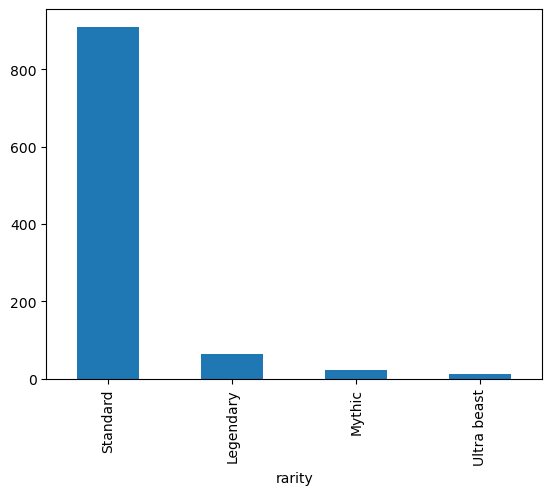

In [22]:
df['rarity'].value_counts().plot(kind = 'bar')  # Imbalanced Classification Problem (Highly Skewed)

# SMOTE -->
# Weights for each class as you are training the model
# Mix of OverSampling and UnderSampling!

### 2.3 View the columns of the data and understand them

In [23]:
# Display all column names in the DataFrame
df.columns

Index(['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense',
       'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves',
       'candy_required', 'distance', 'max_cp', 'attack_probability',
       'base_capture_rate', 'base_flee_rate', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

### 2.4 Check the shape of the dataset

In [24]:
# Get the shape of the DataFrame
df.shape # 1007 pokemons, 24 decsriptors

(1007, 24)


### 2.5 Understand the datatypes of each of the columns

In [25]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                471 non-null    float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            904 non-null    float64
 13  bas

### 2.6 Generate Descriptive Statistics and closely examine the results to assess the skewness of the values in the columns

In [26]:
# Generate descriptive statistics for numeric columns
df.describe().T # Numeric Fetaures

,count,mean,std,min,25%,50%,75%,max
pokemon_id,1007.0,504.105263,291.003489,1.0,252.50,504.00,755.50,1008.0
base_attack,1007.0,166.268123,59.382689,0.0,119.00,165.00,211.00,414.0
base_defense,1007.0,143.824230,52.023124,0.0,103.00,142.00,179.00,505.0
base_stamina,1007.0,171.078451,47.956251,0.0,137.00,167.00,193.00,496.0
candy_required,471.0,65.995754,61.598321,12.0,25.00,50.00,100.00,400.0
distance,1007.0,5.058590,5.458459,1.0,3.00,3.00,5.00,20.0
max_cp,1007.0,2309.782522,1118.813651,16.0,1306.00,2304.00,3138.00,9366.0
attack_probability,904.0,0.140951,0.090397,0.0,0.10,0.10,0.20,0.7
base_capture_rate,904.0,-1.000000,0.000000,-1.0,-1.00,-1.00,-1.00,-1.0
base_flee_rate,904.0,-1.000000,0.000000,-1.0,-1.00,-1.00,-1.00,-1.0


In [27]:
211 + 1.5 * (211 - 119.00)

# Tree based [Ensemble] models are comparatively less susceptible to outliers!

349.0

### 2.7 Generate Descriptive Statistics for categorical columns and closely examine the results

In [28]:
# Generate descriptive statistics for categorical columns
df.select_dtypes(['object']).describe()

,pokemon_name,type,rarity,charged_moves,fast_moves,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
count,1007,1007,1007,1007,1007,744,744,744,744,744,744
unique,1007,206,4,894,691,2,2,2,2,2,2
top,Bulbasaur,['Water'],Standard,['Struggle'],['Splash'],False,False,True,True,True,True
freq,1,73,910,36,17,685,379,737,741,455,738


### 2.8 Check the Null values
* Calculate the count of null values for each column in the DataFrame.
* Determine the percentage of null values in each column relative to the total number of rows.
* Create a new DataFrame that summarizes both the count and percentage of null values.
* Filter the summary DataFrame to only display columns that contain null values.
* Print the resulting summary DataFrame.

In [29]:
# Calculate the count of null (NaN) values in each column of the DataFrame 'df'
df.loc[:, df.isnull().sum()/df.shape[0] * 100 > 0].isnull().sum()

# Calculate the percentage of null values for each column
# This is done by dividing the null counts by the total number of rows in 'df' (len(df))
# and multiplying by 100 to convert it to a percentage


# Creating a new DataFrame to hold null counts and percentages


# Filtering to only show columns with null values


# Displaying the null summary DataFrame


candy_required                  536
attack_probability              103
base_capture_rate               103
base_flee_rate                  103
dodge_probability               103
max_pokemon_action_frequency    103
min_pokemon_action_frequency    103
found_egg                       263
found_evolution                 263
found_wild                      263
found_research                  263
found_raid                      263
found_photobomb                 263
dtype: int64

### 2.9 Drop the `candy_required` column from original df

In [30]:
# Drop the 'candy_required' from the original dataframe df
df.drop('candy_required', axis = 1, inplace = True) # Make changes to the original df

### 2.10 Drop the `candy_required` index from null_summary

In [31]:
# Drop the 'candy_required' from the index of null summary


### 2.11 Print the null_summary dataframe

In [32]:
# Displaying the null summary DataFrame


### 2.12 Fill na values


2.12.1 Slice the required column names from the null_summary

In [33]:
df.head(2)

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",3,1275,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",3,1943,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [34]:
df.columns[17:]

Index(['found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

In [35]:
numerical_cols_indexes = [2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16]
boolean_cols_indexes = [17, 18, 19, 20, 21, 22]

In [36]:
# Define indices for numerical and boolean columns
  # Indices of numerical columns for imputation
  # Indices of boolean columns for imputation

2.12.2 Run a loop to impute the mean values to the numerical columns in the original dataframe(df)

In [37]:
# Impute mean for numerical columns
for each_index in numerical_cols_indexes:
  df.iloc[:, each_index] = df.iloc[:, each_index].fillna(df.iloc[:, each_index].mean())

In [38]:
df.columns.shape

(23,)

In [39]:
# Boolean cols
for each_index in boolean_cols_indexes:
  df.iloc[:, each_index] = df.iloc[:, each_index].fillna(df.iloc[:, each_index].mode()[0])

In [40]:
df.iloc[:, boolean_cols_indexes] = df.iloc[:, boolean_cols_indexes].astype(int)

In [41]:
df.iloc[:, boolean_cols_indexes].astype(int)

,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,0,1,1,1,1
1,0,1,1,1,1,1
2,0,1,1,1,1,1
3,1,0,1,1,1,1
4,0,1,1,1,1,1
...,...,...,...,...,...,...
1002,0,0,1,1,1,1
1003,0,0,1,1,1,1
1004,0,0,1,1,1,1
1005,0,0,1,1,1,1


2.12.3 Run a loop to impute the mode values to the categorical columns in the original dataframe(df)

In [42]:
# Impute default value for boolean columns
# Done it using Mode

2.12.4 Check the null values in df(original dataframe) after imputation

In [43]:
# Check the null values in the original df using isna()
df.isna().sum()

pokemon_id                      0
pokemon_name                    0
base_attack                     0
base_defense                    0
base_stamina                    0
type                            0
rarity                          0
charged_moves                   0
fast_moves                      0
distance                        0
max_cp                          0
attack_probability              0
base_capture_rate               0
base_flee_rate                  0
dodge_probability               0
max_pokemon_action_frequency    0
min_pokemon_action_frequency    0
found_egg                       0
found_evolution                 0
found_wild                      0
found_research                  0
found_raid                      0
found_photobomb                 0
dtype: int64

### 2.13 Find unique value count for each feature

In [44]:
# Get the count of unique values in each column of the DataFrame
df.nunique()

pokemon_id                      1007
pokemon_name                    1007
base_attack                      244
base_defense                     210
base_stamina                     117
type                             206
rarity                             4
charged_moves                    894
fast_moves                       691
distance                           4
max_cp                           845
attack_probability                17
base_capture_rate                  1
base_flee_rate                     1
dodge_probability                 13
max_pokemon_action_frequency       3
min_pokemon_action_frequency       5
found_egg                          2
found_evolution                    2
found_wild                         2
found_research                     2
found_raid                         2
found_photobomb                    2
dtype: int64

### 2.14 Drop features with only 1 unique value

In [45]:
# Drop column with only 1 unique value as it adds no value during model training
df.drop(['base_capture_rate', 'base_flee_rate'], axis = 1, inplace = True)

### 2.15 Drop features which all values unique

In [46]:
# Drop column with all values unique because the only act as identifier of records
df.drop(['pokemon_id', 'pokemon_name'], axis = 1, inplace = True)

### 2.16 Dropping `charged_moves` and `fast_moves` because of there high cardinality.

In [47]:
type(df.loc[0, 'charged_moves'])

str

In [48]:
df.loc[0, 'charged_moves'].replace("'",'').replace('[','').replace(']', '').replace(' ', '').split(',')

['SludgeBomb', 'SeedBomb', 'PowerWhip']

In [49]:
#Drop column with high cardinal categorical columns as the data size is not
#that huge such columns will be difficult to learn

l = []
for each_list in df['charged_moves']:
    l.extend(each_list.replace("'",'').replace('[','').replace(']', '').replace(' ', '').split(','))

len(set(l))

#      M1  M2 M3 ...  M160
#       1   1 0 0 0

160

In [50]:
df.drop(['charged_moves', 'fast_moves'], axis = 1, inplace = True)

## STEP 3: Exploratory Data Analysis(EDA)

In [51]:
# Separate numeric and categorical columns
df.columns

Index(['base_attack', 'base_defense', 'base_stamina', 'type', 'rarity',
       'distance', 'max_cp', 'attack_probability', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

In [52]:
df.columns[11:]

Index(['found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

In [53]:
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
bool_cols = df.columns[11:]

In [54]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/9f/71/34ddbd21f1da67c7a768146968b4d0220ee6831e4bcbad3e03dd3eae88b6/scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 2.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.4 MB 2.8 MB/s eta

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sukri\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [55]:
# from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df['type'])

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [56]:
cv.vocabulary_

{'grass': 9,
 'poison': 13,
 'fire': 6,
 'flying': 7,
 'water': 17,
 'bug': 0,
 'normal': 12,
 'dark': 1,
 'electric': 3,
 'psychic': 14,
 'ice': 11,
 'steel': 16,
 'ground': 10,
 'fairy': 4,
 'fighting': 5,
 'rock': 15,
 'ghost': 8,
 'dragon': 2}

In [57]:
cv.transform(df['type']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [58]:
type_df = pd.DataFrame(cv.transform(df['type']).toarray(), columns = sorted(cv.vocabulary_))
type_df.head()

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# from sklearn.preprocessing import MultiLabelBinarizer

In [60]:
df = pd.concat([df, type_df], axis = 1 )
df.drop('type', axis = 1, inplace = True)

### 3.1 Check the distribution of the target variable - `rarity`.

In [61]:
# Check the distribution of the target variable 'y'

# Set the figure size for better readability


# Create a count plot for the 'y' variable in the dataset


# Add a title to the plot


# Label the x-axis


# Label the y-axis


# Display the plot


# STEP 4: Feature Engineering

### 4.1 Perform correlation analysis of the data

In [62]:
df['rarity'].unique()

array(['Standard', 'Legendary', 'Mythic', 'Ultra beast'], dtype=object)

In [63]:
df['rarity'] = df['rarity'].map({'Standard':0, 'Legendary':1, 'Mythic':2, 'Ultra beast':3}).values

In [64]:
df['rarity'].value_counts()

rarity
0    910
1     64
2     22
3     11
Name: count, dtype: int64

<Axes: >

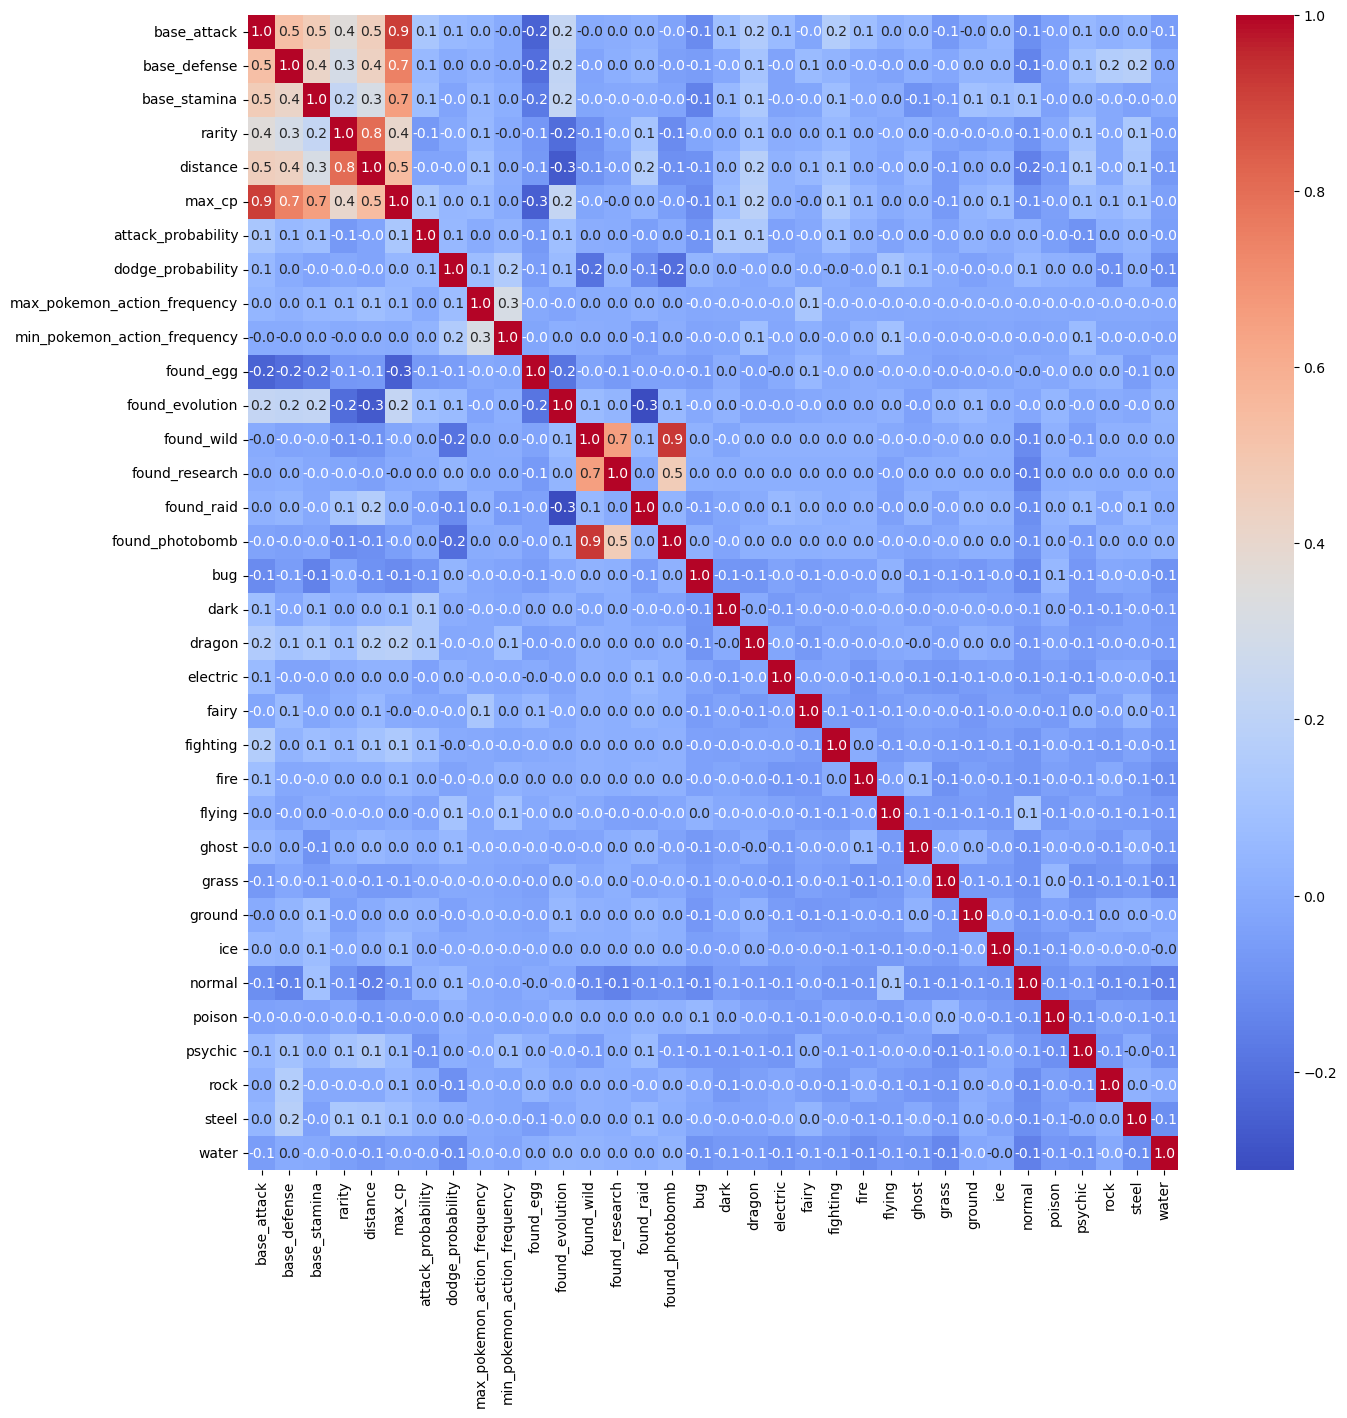

In [65]:
#Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable

# Encoded the rarity column  # Alternative: from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt

plt.figure(figsize = (15, 15))

import seaborn as sns
# Create a heatmap to visualize the correlation matrix of the numeric features in the dataset
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f')


# The 'annot=True' parameter adds the correlation values directly on the heatmap
# 'cmap='coolwarm'' applies a color map to distinguish positive and negative correlations clearly


# Display the heatmap


### 4.2: Combining and removing features with high correlation

- **Base Attack:** The base attack stat of the Pokémon, which determines its offensive capabilities in battles.
- **Base Defense:** The base defense stat of the Pokémon, which indicates how well it can withstand attacks from opponents.
- **Base Stamina:** The base stamina (HP) stat of the Pokémon, representing its overall health and endurance during battles.
- **Max CP:** The maximum Combat Power (CP) that the Pokémon can achieve, indicating its potential strength in battles.

Sum the base attack, base defense, and base stamina to create a total stats feature, giving a quick overview of a Pokémon's overall potential.

The ratio of Total Stats to Max CP can provide insights into the overall effectiveness and balance of a Pokémon in battles.

4.2.1 Pre-processing columns
* Sum the values of the `base_attack`, `base_defense`, and `base_stamina` columns to create a new feature called `total_stats`. This will give a quick overview of a Pokémon's overall potential.

* Using the `total_stats` feature, calculate the ratio of `total_stats` to `max_cp` for each Pokémon. What insights does this ratio provide about a Pokémon's effectiveness and balance in battles?

In [66]:
# Calculate the total stats of the Pokémon by summing base attack, defense, and stamina
  # Total stats feature

# Calculate CP efficiency by dividing total stats by maximum Combat Power (CP)
  # CP efficiency feature
# Feature Creation

df['total_stats'] = df['base_attack'] + df['base_defense'] + df['base_stamina']
df['CP_efficiency'] = df['total_stats']/df['max_cp']

4.2.2 Drop Redundant Columns

* Drop the columns `base_attack`, `base_defense`, `base_stamina`, `max_cp`, and `total_stats`.

* Since we have already created a comprehensive feature (`total_stats`) that sums up the attack, defense, and stamina, and calculated the ratio to max_cp, these individual columns are now redundant. Dropping them simplifies the dataset and prevents redundancy in model training, ensuring the model focuses on more meaningful and non-correlated features.

In [67]:
# Drop base_attack, base_defense, base_stamina, max_cp, and total_stats.
df.drop(['base_attack', 'base_defense', 'base_stamina', 'max_cp', 'total_stats'], axis = 1, inplace = True)

In [68]:
df.columns

Index(['rarity', 'distance', 'attack_probability', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb', 'bug', 'dark', 'dragon', 'electric',
       'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground',
       'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water',
       'CP_efficiency'],
      dtype='object')

4.2.3 Drop `found_wild`, `found_research` columns
* For the features `found_photobomb`, `found_wild`, and `found_research`, we will retain only one of them and remove the others due to their high correlation, with correlation values approaching 1. This will help reduce redundancy in our dataset and improve the model's efficiency.

In [69]:
# Drop found_wild, found_research columns
df.drop(['found_wild', 'found_research'], axis = 1, inplace = True)

### 4.3 Perform One-hot encoding on `type` feature

In Pokémon GO, Pokémon types play a crucial role in battles, influencing effectiveness against other types and overall strategy. Here are the main types of Pokémon in the game:

- **Normal:** Generally versatile but has no specific strengths or weaknesses.
- **Fire:** Strong against Grass, Bug, Ice, and Steel; weak to Water, Rock, and Ground.
- **Water:** Strong against Fire, Ground, and Rock; weak to Electric and Grass.
- **Grass:** Strong against Water, Ground, and Rock; weak to Fire, Ice, Poison, Flying, and Bug.
- **Electric:** Strong against Water and Flying; weak to Ground.
- **Ice:** Strong against Grass, Ground, Flying, and Dragon; weak to Fire, Fighting, Rock, and Steel.
- **Fighting:** Strong against Normal, Ice, Rock, Dark, and Steel; weak to Flying, Psychic, and Fairy.
- **Poison:** Strong against Grass and Fairy; weak to Ground and Psychic.
- **Ground:** Strong against Fire, Electric, Poison, Rock, and Steel; weak to Water, Grass, and Ice.
- **Flying:** Strong against Grass, Fighting, and Bug; weak to Electric, Rock, and Ice.
- **Psychic:** Strong against Fighting and Poison; weak to Bug, Ghost, and Dark.
- **Bug:** Strong against Grass, Psychic, and Dark; weak to Fire, Flying, Rock, and Fairy.
- **Rock:** Strong against Fire, Ice, Flying, and Bug; weak to Water, Grass, Fighting, Ground, Steel, and Fairy.
- **Ghost:** Strong against Psychic and Ghost; weak to Dark.
- **Dragon:** Strong against Dragon; weak to Ice, Fairy, and Dragon.
- **Dark:** Strong against Psychic and Ghost; weak to Fighting, Bug, and Fairy.
- **Steel:** Strong against Ice, Rock, and Fairy; weak to Fire, Fighting, and Ground.
- **Fairy:** Strong against Fighting, Dragon, and Dark; weak to Poison and Steel.

Each type interacts with others in a rock-paper-scissors manner, making type matchups crucial for battle strategy in Pokémon GO. This feature is also important for predicting rarity, as certain combinations of types can be common, while others may be rare and powerful.

4.3.1 Check `type` column

In [70]:
# Display the first few entries of the 'type' column


Note: Run the below cell to create a function which splits the list values.

In [71]:
# Function to split the items in the list
def process_type_column(value):
    """
    Process a string representing Pokémon types into a list.

    This function removes unwanted characters (single quotes, brackets)
    from the input string and splits it by commas to create a list
    of individual types.

    Parameters:
    value (str): A string containing Pokémon types.

    Returns:
    list: A list of Pokémon types as strings.
    """
    # Remove single quotes from the string
    value = value.replace("'", "")

    # Remove opening and closing brackets
    value = value.replace("[", "")
    value = value.replace("]", "")

    # Split the cleaned string by commas into a list
    value = value.split(',')

    return value  # Return the list of types

Note: Run the below cell to create a unique types dictonary.

In [72]:
# Define a set of unique Pokémon types
unique_types = [
    'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
    'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
    'Psychic', 'Rock', 'Steel', 'Water'
]

# Create a dictionary with each unique type as a key,
# and initialize its value as a list of zeros with the length of the DataFrame
unique_types_dict = {ky: [0] * df.shape[0] for ky in unique_types}  # This prepares a structure to track the presence of each type for every Pokémon in the DataFrame

4.3.2 Encode `Type` into Binary Features

* Iterate over the `type` column in the DataFrame, process the list format values using the `process_type_column` function, and then update the `unique_types_dict` with binary indicators for each unique  `type`.

Instructions:
* Use the provided `process_type_column` function to split the list of types in the type column into individual type values.
* For each type, set the corresponding entry in `unique_types_dict` to 1, indicating the presence of that type for the current .
* This step will help convert the list of types into a binary feature matrix, allowing the types to be used in the model for training.

In [73]:
# Iterate over the index and value of each entry in the 'type' column of the DataFrame

    # Process the string to get a list of individual types


    # Iterate over each type in the list

        # Remove any leading or trailing whitespace from the type


        # Set the corresponding entry in the unique_types_dict to 1,
        # indicating the presence of this type for the current Pokémon


4.3.3 Create a Dataframe(df_type)

In [74]:
# Create a DataFrame from the unique_types_dict
df.head()

,rarity,distance,attack_probability,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_raid,found_photobomb,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,CP_efficiency
0,0,3,0.1,0.15,1.6,0.2,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.280000
1,0,3,0.1,0.15,1.6,0.2,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.231086
2,0,3,0.2,0.15,1.6,0.2,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.185411
3,0,3,0.1,0.15,1.6,0.2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.291704
4,0,3,0.1,0.15,1.6,0.2,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.230037


4.3.4 Check the values of df_type

In [75]:
# Display the first 5 rows of df_type


4.3.5 Concatenate the df_type with original dataframe(df)

In [76]:
# Concatenate the original DataFrame (df) with the new type DataFrame (df_type) along the columns


Since we have separately encoded the values from the `type` column into binary features, it is now necessary to drop the original `type` column from the DataFrame.


4.3.6 Drop the `type` column

In [77]:
# Drop the 'type' column from the DataFrame as it is now represented by the new binary columns


4.3.7 Check the original dataset

In [78]:
# Get the first 5 rows of df


### 4.4 Encode target column(`rarity`) to numeric

In [79]:
# Import the LabelEncoder class for encoding categorical labels

# Initialize the LabelEncoder


# Transform the 'rarity' column into numerical format using label encoding
  # Each unique rarity class is assigned a numerical value, making it suitable for model training

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop('rarity', axis = 1)
y = df['rarity']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 1)

### 4.5 Balance Data using SMOTE

In [81]:
!pip install imbalanced-learn

In [82]:
import numpy as np
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3], dtype=int64), array([634,  45,  16,   9], dtype=int64))

In [84]:
# Apply SMOTE to balance the classes (only to the train data)
# SMOTE is for numeric features only!
# SMOTEN

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1) # sampling_strategy = 1, use it as a hyper_parameter!
X_train, y_train = sm.fit_resample(X_train, y_train)

np.unique(y_train, return_counts = True)
# May lead to overfitting to the minoirty examples

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

### 4.6 Check the Distribution of the Target Variable
* Use the .value_counts() method for the target variable '`rarity`'

# STEP 5: Model Building

### 5.1 Split the data into train and test

### 5.2 Build a Random Forest Classifier on the data

In [ ]:
# Create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Train the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
# Make predictions
preds = rfc.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
# Print the Accuary an classification report
print(classification_report(y_test, preds))

### 5.3 Build a Random Forest Classifier on the data

### STEP 6 : Conclusion

Between the Bagging algorithm(`Random Forest Classifier`) and the Boosting alogorithm(`Gradient Boosting Classifier`), which model performs better and why?

Consider the accuracy, precision, recall, and F1-score when making your decision.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print(classification_report(y_test, gbc.predict(X_test)))

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
xgb.XGBCLa